<a href="https://colab.research.google.com/github/isacristinagian/.gitignore/blob/main/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression



Estudo para demonstrar a correlação entre ações que pagam dividendos e respectivas valorizações na bolsa de valores.

A regressão linear é um algoritmo de aprendizado de máquina baseado em aprendizado supervisionado.Usado para interpretar relaçao entre variáveis numéricas e previsão.

Gerando arquivo com dados Nasdaq e Bovespa.

In [9]:
dados = pd.read_excel('/dividendos.xlsx')
dados.shape

(168, 5)

In [13]:
dados.head()

,Ações,Preco_Atual,Dividendos,Upside,DY
0,AGRO3,26.35,0.668270,0.227135,0.00
1,AGXY3,1.48,0.000000,0.000000,7.19
2,JALL3,6.79,0.421119,0.870398,6.79
3,RAIZ4,3.25,0.226255,-0.846154,12.41
4,SLCE3,18.20,1.342706,0.769231,5.65


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ações        168 non-null    object 
 1   Preco_Atual  168 non-null    float64
 2   Dividendos   168 non-null    float64
 3   Upside       168 non-null    float64
 4   DY           168 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.7+ KB


In [20]:
print(dados.dtypes)

Ações           object
Preco_Atual    float64
Dividendos     float64
Upside         float64
DY             float64
dtype: object


In [21]:
from types import TracebackType
from numpy import dtypes

Verificar se há uma correlação entre os valores dos preços atuais das ações e o upside (potencial de valorização do ativo no mercado financeiro), com base nesta amostra, utilizando Coeficiente de Pearson:

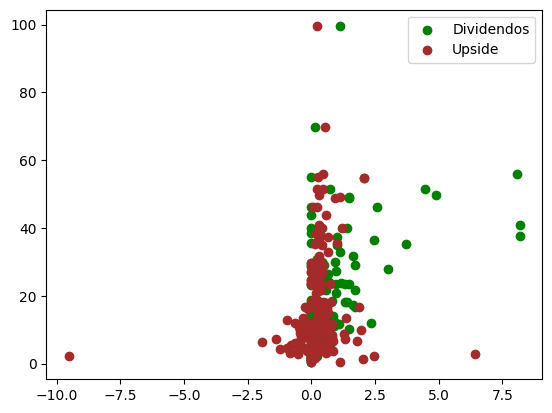

In [22]:
plt.scatter(dados.Dividendos, dados.Preco_Atual, c='green', label='Dividendos')
plt.scatter(dados.Upside, dados.Preco_Atual,c="brown", label='Upside')
plt.legend()

In [23]:
np.corrcoef(dados.Dividendos, dados.Preco_Atual)

array([[1.        , 0.46283566],
       [0.46283566, 1.        ]])

A correlação é positiva e moderada: empresas que pagam dividendos tem valorização dos preços das ações e vice-versa, conforme esta amostra.

Carregamento de dados e visualização dos dados estatísticos

Indice Nasdaq 2024

In [44]:
base = pd.read_excel('/HistoricalData.xlsx')
base.shape

(21, 5)

In [46]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    21 non-null     datetime64[ns]
 1   Open    21 non-null     float64       
 2   High    21 non-null     float64       
 3   Low     21 non-null     float64       
 4   Close   21 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 968.0 bytes


In [47]:
base['Data'] = pd.to_datetime(base['Data'])

In [48]:
base.describe()

,Data,Open,High,Low,Close
count,21,21.000000,21.000000,21.000000,21.000000
mean,2024-08-02 18:17:08.571428608,18923.577143,19142.824286,18673.423810,18910.378095
min,2024-07-19 00:00:00,17729.140000,18186.110000,17249.300000,17876.510000
25%,2024-07-26 00:00:00,18533.360000,18675.730000,18288.860000,18514.470000
50%,2024-08-02 00:00:00,18995.970000,19189.350000,18745.520000,19014.510000
75%,2024-08-09 00:00:00,19514.180000,19591.230000,19020.440000,19375.050000
max,2024-08-16 00:00:00,19794.970000,19933.220000,19712.030000,19836.540000
std,NaN,606.966832,532.636233,636.303402,571.358703


In [49]:
base.dropna()

,Data,Open,High,Low,Close
0,2024-08-16,19514.18,19596.61,19362.94,19515.72
1,2024-08-15,19023.65,19515.75,19020.44,19497.78
2,2024-08-14,19025.90,19116.99,18839.74,19023.01
3,2024-08-13,18565.14,19022.75,18548.17,19014.51
4,2024-08-12,18533.36,18675.73,18435.55,18554.76
5,2024-08-09,18489.96,18579.67,18288.86,18514.47
6,2024-08-08,17729.14,18459.27,17727.64,18420.09
7,2024-08-07,17964.55,18458.97,17853.53,17876.51
8,2024-08-06,18167.97,18381.61,17859.69,18069.43
9,2024-08-05,18151.28,18186.11,17249.30,17924.86


In [50]:
base.High.mean()

19142.824285714287

Analisando tendências entre "maiores altas" e valor de fechamento.

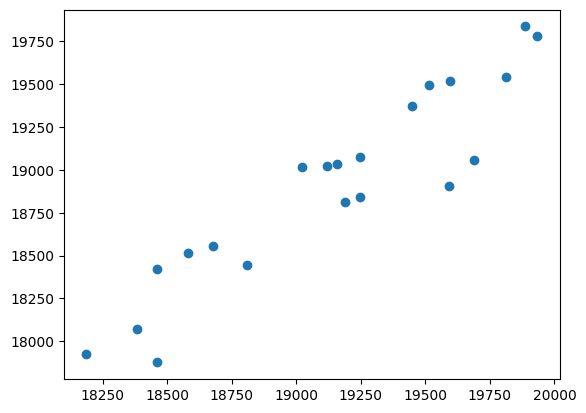

In [51]:
x = base['High']
y = base['Close']
plt.scatter(x,y)

Para ajustar um polinômio de 1º grau, demonstrando os coeficientes da reta.

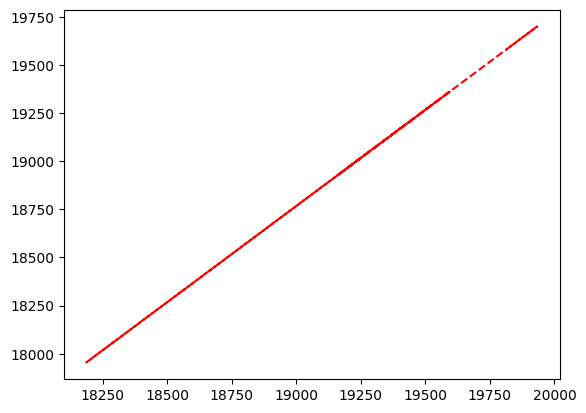

In [52]:
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [53]:
import yfinance as yf

In [54]:
volatilidade_diaria = base['Low'].std()
volatilidade_diaria

636.3034018805512

<Axes: xlabel='Data'>

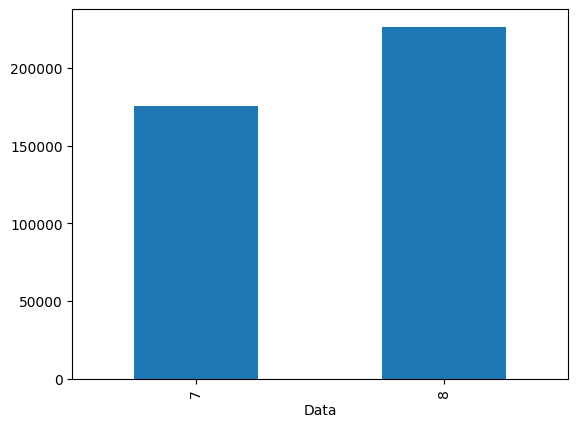

In [55]:
agrupamento2 = base.groupby(base['Data'].dt.month)["High"].sum().plot.bar()
agrupamento2

Análise ação empresa "Z"

In [56]:
base2 = pd.read_excel("/Acoes.xlsx")
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     31 non-null     datetime64[ns]
 1   Cotacao  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [57]:
base2.describe()

,Data,Cotacao
count,31,31.000000
mean,2024-07-21 14:42:34.838709760,7.270968
min,2024-07-01 00:00:00,5.730000
25%,2024-07-10 12:00:00,6.095000
50%,2024-07-22 00:00:00,7.970000
75%,2024-08-01 00:00:00,8.145000
max,2024-08-13 00:00:00,8.560000
std,NaN,1.092451


In [58]:
base2.dropna()

,Data,Cotacao
0,2024-07-01,6.13
1,2024-07-02,7.97
2,2024-08-02,5.94
3,2024-07-03,7.99
4,2024-07-04,8.15
5,2024-07-05,7.99
6,2024-08-05,5.81
7,2024-08-06,5.77
8,2024-08-07,5.73
9,2024-07-08,7.87


In [59]:
base2.Cotacao.median()

7.97

In [60]:
volatilidade2 = base2['Cotacao'].std()
volatilidade2

1.0924509289931814

In [62]:
np.var(base2.Cotacao)

1.1549506763787725

In [68]:
base3 = pd.read_excel("/Upside.xlsx")
base3.head()

,Empresa,Ticker,Setor,Preço,Preço.1,% Upside,VAR Alvo
0,NaN,NaN,NaN,Alvo (R$),Atual (R$),NaN,NaN
1,BrasilAgro,AGRO3,Agro,29.7,25.75,0.15,0.132997
2,Jalles Machado,JALL3,Agro,12.7,6.71,0.89,0.471654
3,Raizen,RAIZ4,Agro,6,3.24,0.85,0.460000
4,SLC Agricola,SLCE3,Agro,19.6,17.79,0.10,0.092347


In [69]:
base3.dropna()

,Empresa,Ticker,Setor,Preço,Preço.1,% Upside,VAR Alvo
1,BrasilAgro,AGRO3,Agro,29.7,25.75,0.15,0.132997
2,Jalles Machado,JALL3,Agro,12.7,6.71,0.89,0.471654
3,Raizen,RAIZ4,Agro,6,3.24,0.85,0.460000
4,SLC Agricola,SLCE3,Agro,19.6,17.79,0.10,0.092347
5,São Martinho,SMTO3,Agro,33.2,29.09,0.14,0.123795
...,...,...,...,...,...,...,...
76,PetroReconcavo,RECV3,Petróleo e Gás,27.7,21.06,0.32,0.239711
77,Ultrapar,UGPA3,Petróleo e Gás,28.8,23.59,0.22,0.180903
78,Unipar,UNIP3,Petróleo e Gás,95,47.65,0.99,0.498421
79,Unipar,UNIP6,Petróleo e Gás,105,48.5,1.16,0.538095


In [70]:
base3.describe()

,% Upside,VAR Alvo
count,80.000000,80.000000
mean,0.378750,0.203375
std,0.433205,0.239221
min,-0.420000,-0.719481
25%,0.120000,0.104918
50%,0.300000,0.228615
75%,0.522500,0.340108
max,2.160000,0.618750


Visualização dos dados estatísticos

In [72]:
base3.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [73]:
base3.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [74]:
previsores = base3.data
classe =base3.target

Criação do modelo de teste, para treinamento ele criou 14 registros

In [85]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste =train_test_split(previsores, classe, test_size=.3, random_state=0)
len(x_treinamento)

14

Criação do modelo para treinamento, usando kmeans

In [87]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=30, metric='minkowski',metric_params=None,n_jobs=None,n_neighbors=5, p=2, weights='uniform')
knn.fit(x_treinamento, y_treinamento)

KNeighborsClassifier()

Aprendizado baseado em instância

In [88]:
y_pred = knn.predict(x_teste)
y_pred

array([[154.,  33.,  46.],
       [162.,  38.,  56.],
       [162.,  36.,  56.],
       [154.,  34.,  46.],
       [162.,  35.,  56.],
       [154.,  33.,  46.]])